<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T4%20-%202%20-%20Linear%20Regression%20-%20Regresión%20lineal%20con%20statsmodel-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 523.15 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Checking out files: 100% (16940/16940), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive'

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Regresión lineal simple en Python
## El paquete statsmodel para regresión lineal

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#Se importa las funciones para crear el modelo lineal
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#Se usa la librería para crear le modelo lineal 
#           (formula = "var salida~var predictora", data = Nombre_del_dataset).fit()
lm = smf.ols(formula="Sales~TV", data = data).fit()

In [8]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64


*   Intercept = $\alpha$
*   TV = $\beta$

El modelo lineal predictivo sería 
Sales = 7.032594 + 0.047537 * TV

Los p-valores se calculan para rechazar la hipotésis nula de que no se tenga correlación ($\alpha$  y  $\beta$ = 0).

Se espera que los p-valores tengan un valor muy pequeño. Esto para poder ser menores que cualquier nivel de significancia y podre así rechazar la $H_0$.

In [9]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

Se calcula el valor de $R^2$ para conocer la eficacia del modelp.

In [11]:
lm.rsquared

0.611875050850071

In [12]:
lm.rsquared_adj

0.6099148238341623

--Se puede obtener un resumen rápido con muchos de los estadísitcos del modelo lineal que se calcula-- 

In [13]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.47e-42
Time:                        20:34:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
Se puede usar el modelo para predecir los valores:

In [14]:
# Se usa únicamente la variable predictora del dataset original para crear una columna con los valores predecidos por el modelo creado.
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [15]:
import matplotlib.pyplot as plt

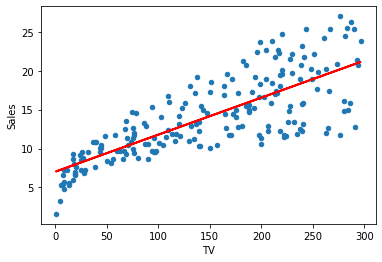

In [16]:
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y ="Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c="red", linewidth = 2)

In [17]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [18]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [19]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [20]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [21]:
sales_m = np.mean(data["Sales"])

In [22]:
sales_m

14.0225

In [23]:
error = RSE/sales_m

In [24]:
error

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

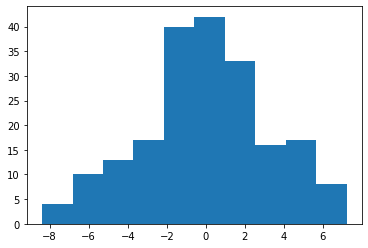

In [26]:
plt.hist((data["Sales"]-data["sales_pred"]))

# Regresión lineal múltiple en Python
## El paquete statsmodel para regresión múltiple
* Sales ~TV  --> lm
* Sales ~Newspaper  --> No considerado. Solo 1 variable y menos correlacion que TV
* Sales ~Radio  --> No considerado. Solo 1 variable y menos correlacion que TV
* Sales ~TV+Newspaper  --> lm2
* Sales ~TV+Radio  --> lm3
* Sales ~Newspaper+Radio  --> No considerado. LAs dos variables con menos relación con la salida
* Sales ~TV+Newspaper+Radio  --> lm4

In [28]:
#Añadir el Newspaper al modelo existente
lm2 = smf.ols(formula="Sales~TV+Newspaper", data = data).fit()

In [29]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [30]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

Sales = 5.774948+0.046901*TV + 0.044219*Newspaper

In [31]:
lm2.rsquared

0.6458354938293271

In [32]:
lm2.rsquared_adj

0.6422399150864777

In [33]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])

In [34]:
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [35]:
SSD = sum((data["Sales"]-sales_pred)**2)

In [36]:
SSD

1918.561811896827

In [42]:
RSE = np.sqrt(SSD/(len(data)-2-1))  #LA fórmula cambia: SSD/n-k-1

In [38]:
RSE

3.120719860252885

In [39]:
error = RSE / sales_m

In [40]:
error

0.2225508903728212

In [41]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           3.95e-45
Time:                        21:24:25   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Añadir la Radio al modelo existente
lm3 = smf.ols(formula="Sales~TV+Radio", data = data).fit()

In [44]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.83e-98
Time:                        21:27:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
sales_pred = lm3.predict(data[["TV", "Radio"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [46]:
RSE

1.6813609125080011

In [49]:
error = RSE/sales_m
error

0.11990450436855062

In [50]:
#Añadir el newspaper al modelo existente
lm4 = smf.ols(formula="Sales~TV+Radio+Newspaper", data = data).fit()

In [51]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.58e-96
Time:                        21:29:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
sales_pred = lm4.predict(data[["TV", "Radio","Newspaper"]])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3-1))

In [53]:
RSE

1.6855103734147436

In [55]:
error = RSE/sales_m
error

0.12020041885646236

## Multicolinealidad 
#### Factor Inflación de la Varianza
* VIF = 1 : Las variables no están correlacionadas
* VIF < 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF >5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [ ]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239288

In [ ]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF = 1/(1-rsquared_tv)
VIF

1.0046107849396502

In [ ]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF = 1/(1-rsquared_r)
VIF

1.1449519171055353

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           4.83e-98
Time:                        16:00:23   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""